In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

In [3]:
# Load dataset 
data = pd.read_csv('credit - credit.csv', skiprows=1)
data = data.sample(5000, random_state=42)

print(data.columns)
print(data.describe())
print(data.info())
print(data.isnull().sum())
data.drop(columns=['ID'], inplace=True)
print(data.columns)


Index(['ID', 'LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')
                 ID      LIMIT_BAL       GENDER    EDUCATION     MARRIAGE  \
count   5000.000000    5000.000000  5000.000000  5000.000000  5000.000000   
mean   14914.170200  167192.000000     1.596600     1.855200     1.550000   
std     8552.697261  128399.113714     0.490629     0.778431     0.517642   
min        7.000000   10000.000000     1.000000     0.000000     0.000000   
25%     7599.500000   50000.000000     1.000000     1.000000     1.000000   
50%    14758.500000  140000.000000     2.000000     2.000000     2.000000   
75%    22334.750000  240000.000000     2.000000     2.000000     2.000000   
max    30000.000000  800000.000

In [4]:
# Target column: default payment (0 = No, 1 = Yes)
y = data['default payment next month']

# Select only TWO features for visualization
X = data[['BILL_AMT1', 'BILL_AMT2']]
print(X.dtypes)
print(X.head())

BILL_AMT1    int64
BILL_AMT2    int64
dtype: object
       BILL_AMT1  BILL_AMT2
2308        8864      10062
22404     136736     125651
23397      70122      69080
25058      20678      18956
2664       94228      47635


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
models = {
    "Linear SVM": SVC(kernel='linear', C=1, class_weight='balanced'),
    "Polynomial SVM": SVC(kernel='poly', degree=2, C=1, gamma = 'scale', class_weight='balanced'),
    "RBF SVM": SVC(kernel='rbf', C=5, gamma = 0.1, class_weight='balanced')
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    print(f"\n--- {name} ---")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1 Score: {f1_score(y_test, y_pred):.4f}")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}\n")


--- Linear SVM ---
Confusion Matrix:
[[ 103 1056]
 [  34  307]]
Precision: 0.2252
Recall: 0.9003
F1 Score: 0.3603
Accuracy: 0.2733


--- Polynomial SVM ---
Confusion Matrix:
[[  35 1124]
 [   8  333]]
Precision: 0.2286
Recall: 0.9765
F1 Score: 0.3704
Accuracy: 0.2453


--- RBF SVM ---
Confusion Matrix:
[[560 599]
 [166 175]]
Precision: 0.2261
Recall: 0.5132
F1 Score: 0.3139
Accuracy: 0.4900



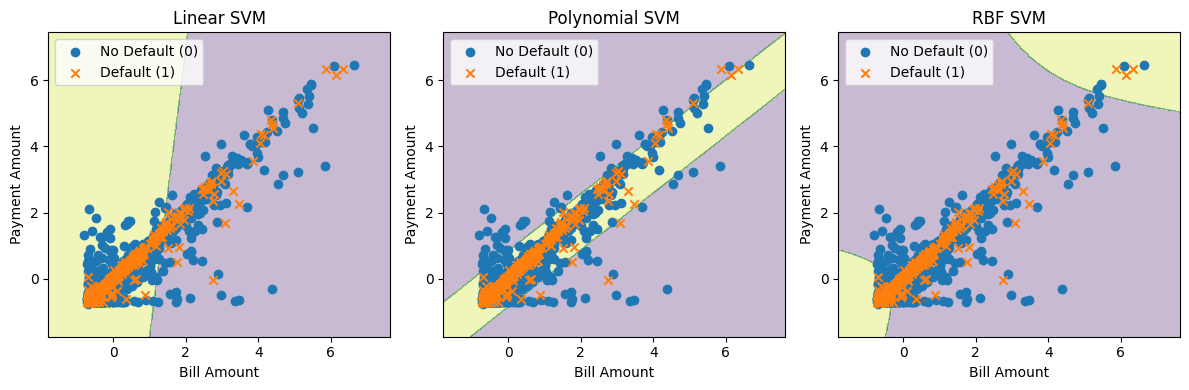

In [8]:
# Decision Boundary Visualization
def plot_decision_boundary(model, title):
    h = 0.02
    x_min, x_max = X_train_scaled[:,0].min() - 1, X_train_scaled[:,0].max() + 1
    y_min, y_max = X_train_scaled[:,1].min() - 1, X_train_scaled[:,1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h), 
        np.arange(y_min, y_max, h)
    )

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    
    # plt.scatter(X_train[:,0], X_train[:,1], c=y_train)
    # class 0
    plt.scatter(X_train_scaled[y_train==0, 0],
                X_train_scaled[y_train==0, 1], 
                label = 'No Default (0)',
                marker='o')
    
    # class 1
    plt.scatter(X_train_scaled[y_train==1, 0],
                X_train_scaled[y_train==1, 1], 
                label = 'Default (1)',
                marker='x')
    
    plt.legend()
    plt.title(title)
    plt.xlabel('Bill Amount')
    plt.ylabel('Payment Amount')

plt.figure(figsize=(12, 4))

for i, (name, model) in enumerate(models.items()):
    plt.subplot(1, 3, i+1)
    model.fit(X_train_scaled, y_train)
    plot_decision_boundary(model, name)

plt.tight_layout()
plt.show()
